## Assignment 2 ML (Sarthak Narang, COE19 , Roll- 102003627)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 - Feature Selection, Cleaning, and Preprocessing

In [2]:
awcustomer=pd.read_csv("datasets/AWCustomers.csv")
awcustomer.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,LastUpdated
0,21173,NaN,Chad,C,Yuan,NaN,7090 C. Mount Hood,NaN,Wollongong,New South Wales,...,Bachelors,Clerical,M,M,1,3,0,1,81916,2017-03-06
1,13249,NaN,Ryan,NaN,Perry,NaN,3651 Willow Lake Rd,NaN,Shawnee,British Columbia,...,Partial College,Clerical,M,M,1,2,1,2,81076,2017-03-06
2,29350,NaN,Julia,NaN,Thompson,NaN,1774 Tice Valley Blvd.,NaN,West Covina,California,...,Bachelors,Clerical,F,S,0,3,0,0,86387,2017-03-06
3,13503,NaN,Theodore,NaN,Gomez,NaN,2103 Baldwin Dr,NaN,Liverpool,England,...,Partial College,Skilled Manual,M,M,1,2,1,2,61481,2017-03-06
4,22803,NaN,Marshall,J,Shan,NaN,Am Gallberg 234,NaN,Werne,Nordrhein-Westfalen,...,Partial College,Skilled Manual,M,S,1,1,0,0,51804,2017-03-06


In [3]:
awsales=pd.read_csv("datasets/AWSales.csv")
awsales.head()

,CustomerID,BikeBuyer,AvgMonthSpend
0,21173,1,50.97
1,13249,1,53.11
2,29350,1,54.08
3,13503,1,56.93
4,22803,1,55.41


In [4]:
awcustomer.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'LastUpdated'],
      dtype='object')

In [5]:
# selecting columns to be removed
useless = ['CustomerID','Title','FirstName','MiddleName','LastName','Suffix','AddressLine1', 'AddressLine2','PostalCode', 'PhoneNumber','LastUpdated','BirthDate','TotalChildren']
newdataframe=awcustomer.drop(useless,axis = 1)
newdataframe.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome
0,Wollongong,New South Wales,Australia,Bachelors,Clerical,M,M,1,3,0,81916
1,Shawnee,British Columbia,Canada,Partial College,Clerical,M,M,1,2,1,81076
2,West Covina,California,United States,Bachelors,Clerical,F,S,0,3,0,86387
3,Liverpool,England,United Kingdom,Partial College,Skilled Manual,M,M,1,2,1,61481
4,Werne,Nordrhein-Westfalen,Germany,Partial College,Skilled Manual,M,S,1,1,0,51804


In [6]:
# adding two columns from awsales
newdataframe['AvgMonthSpend']=awsales['AvgMonthSpend']
newdataframe['BikeBuyer']=awsales['BikeBuyer']
newdataframe.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend,BikeBuyer
0,Wollongong,New South Wales,Australia,Bachelors,Clerical,M,M,1,3,0,81916,50.97,1.0
1,Shawnee,British Columbia,Canada,Partial College,Clerical,M,M,1,2,1,81076,53.11,1.0
2,West Covina,California,United States,Bachelors,Clerical,F,S,0,3,0,86387,54.08,1.0
3,Liverpool,England,United Kingdom,Partial College,Skilled Manual,M,M,1,2,1,61481,56.93,1.0
4,Werne,Nordrhein-Westfalen,Germany,Partial College,Skilled Manual,M,S,1,1,0,51804,55.41,1.0


In [7]:
newdataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  18361 non-null  object 
 1   StateProvinceName     18361 non-null  object 
 2   CountryRegionName     18361 non-null  object 
 3   Education             18361 non-null  object 
 4   Occupation            18361 non-null  object 
 5   Gender                18361 non-null  object 
 6   MaritalStatus         18361 non-null  object 
 7   HomeOwnerFlag         18361 non-null  int64  
 8   NumberCarsOwned       18361 non-null  int64  
 9   NumberChildrenAtHome  18361 non-null  int64  
 10  YearlyIncome          18361 non-null  int64  
 11  AvgMonthSpend         18355 non-null  float64
 12  BikeBuyer             18355 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


## Part 2 - Data Preprocessing and Transformation

## Analysing data

In [8]:
# checking null values

features_with_nulls=[features for features in newdataframe.columns if newdataframe[features].isnull().sum()>1]
for feature in features_with_nulls:
    print(feature,"has",np.round(newdataframe[feature].isnull().mean(),4),'% missing values')

AvgMonthSpend has 0.0003 % missing values
BikeBuyer has 0.0003 % missing values


In [9]:
#list of numerical variables

numerical_features = [feature for feature in newdataframe.columns if newdataframe[feature].dtypes != 'O']
print("Length of numeric variables:",len(numerical_features))
newdataframe[numerical_features].head()

Length of numeric variables: 6


,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend,BikeBuyer
0,1,3,0,81916,50.97,1.0
1,1,2,1,81076,53.11,1.0
2,0,3,0,86387,54.08,1.0
3,1,2,1,61481,56.93,1.0
4,1,1,0,51804,55.41,1.0


In [10]:
# list of discrete features in numerical features

discrete_feature=[feature for feature in numerical_features if len(newdataframe[feature].unique())<7]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 4


['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'BikeBuyer']

In [11]:
# take year feature separate becuase year gaps can cause large data gaps
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearlyIncome']

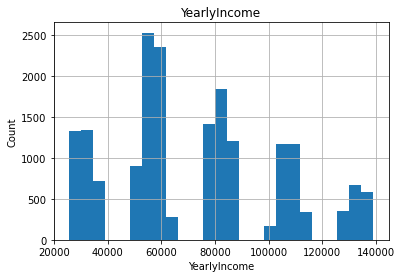

In [12]:
# analyze the year feature by creating Histograms to understand the data
for feature in year_feature:
    data = newdataframe.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    
# discontinous data ... hence we will use log transformation

In [13]:
# checking the continuous features in the numerical features

continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous features count {}".format(len(continuous_feature)))
print(continuous_feature)

Continuous features count 1
['AvgMonthSpend']


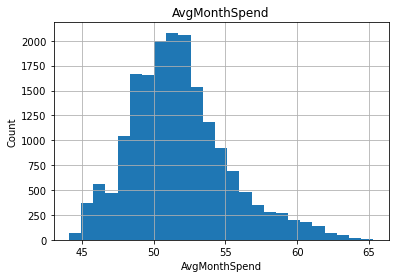

In [14]:
# analyze the continuous feature by creating Histograms to understand the data
for feature in continuous_feature:
    data =newdataframe.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
#continous data . hence we will use binning on it.

In [15]:
# now seeing the categorical feature

data = newdataframe.copy()
categorical_features = [feature for feature in newdataframe.columns if data[feature].dtypes=='O']
categorical_features

['City',
 'StateProvinceName',
 'CountryRegionName',
 'Education',
 'Occupation',
 'Gender',
 'MaritalStatus']

In [16]:
# analysing categorical features . how many have how much unique values..
for feature in categorical_features:
    print("The feature is {} and number of categories are {}".format(feature,len(newdataframe[feature].unique())))

# those above 5 will be transformed using discretization after label encoding while others with one hot encoding and dummy encoding.

The feature is City and number of categories are 269
The feature is StateProvinceName and number of categories are 54
The feature is CountryRegionName and number of categories are 6
The feature is Education and number of categories are 5
The feature is Occupation and number of categories are 5
The feature is Gender and number of categories are 2
The feature is MaritalStatus and number of categories are 2


## Transformation

In [17]:
# Handling NULLS
# since very less number of values are having null we can drop the records (6 records dropped)

newdataframe=newdataframe.dropna()
newdataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18355 entries, 0 to 18354
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  18355 non-null  object 
 1   StateProvinceName     18355 non-null  object 
 2   CountryRegionName     18355 non-null  object 
 3   Education             18355 non-null  object 
 4   Occupation            18355 non-null  object 
 5   Gender                18355 non-null  object 
 6   MaritalStatus         18355 non-null  object 
 7   HomeOwnerFlag         18355 non-null  int64  
 8   NumberCarsOwned       18355 non-null  int64  
 9   NumberChildrenAtHome  18355 non-null  int64  
 10  YearlyIncome          18355 non-null  int64  
 11  AvgMonthSpend         18355 non-null  float64
 12  BikeBuyer             18355 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 2.0+ MB


In [18]:
# Normalization
# handling numerical values

# discrete_features (range 7) will stay as it is

# year_feature will be transformed using lof transformation
newdataframe['YearlyIncome']=np.log(newdataframe['YearlyIncome'])
newdataframe.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend,BikeBuyer
0,Wollongong,New South Wales,Australia,Bachelors,Clerical,M,M,1,3,0,11.313450,50.97,1.0
1,Shawnee,British Columbia,Canada,Partial College,Clerical,M,M,1,2,1,11.303142,53.11,1.0
2,West Covina,California,United States,Bachelors,Clerical,F,S,0,3,0,11.366592,54.08,1.0
3,Liverpool,England,United Kingdom,Partial College,Skilled Manual,M,M,1,2,1,11.026483,56.93,1.0
4,Werne,Nordrhein-Westfalen,Germany,Partial College,Skilled Manual,M,S,1,1,0,10.855223,55.41,1.0


In [19]:
# Discretization
# continuous features , AvgMonthSpend , will undergo binning 

newdataframe['AvgMonthSpend'] = pd.cut(x=newdataframe['AvgMonthSpend'],bins = 5,labels = False,retbins = False,duplicates = 'raise', ordered = True)
newdataframe.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend,BikeBuyer
0,Wollongong,New South Wales,Australia,Bachelors,Clerical,M,M,1,3,0,11.313450,1,1.0
1,Shawnee,British Columbia,Canada,Partial College,Clerical,M,M,1,2,1,11.303142,2,1.0
2,West Covina,California,United States,Bachelors,Clerical,F,S,0,3,0,11.366592,2,1.0
3,Liverpool,England,United Kingdom,Partial College,Skilled Manual,M,M,1,2,1,11.026483,3,1.0
4,Werne,Nordrhein-Westfalen,Germany,Partial College,Skilled Manual,M,S,1,1,0,10.855223,2,1.0


In [20]:
# Discretization on categorical features with more than 5 unique values

excessive_categorical_features = ['City','StateProvinceName','CountryRegionName']
for feature in excessive_categorical_features:
  df_frequency_map = newdataframe[feature].value_counts().to_dict()
  newdataframe[feature] = newdataframe[feature].map(df_frequency_map)
newdataframe.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend,BikeBuyer
0,105,1548,3566,Bachelors,Clerical,M,M,1,3,0,11.313450,1,1.0
1,110,1543,1555,Partial College,Clerical,M,M,1,2,1,11.303142,2,1.0
2,87,4408,7767,Bachelors,Clerical,F,S,0,3,0,11.366592,2,1.0
3,30,1904,1904,Partial College,Skilled Manual,M,M,1,2,1,11.026483,3,1.0
4,56,404,1768,Partial College,Skilled Manual,M,S,1,1,0,10.855223,2,1.0


In [21]:
# scaling down the values using log transformation on uniques

cat1_features=['City','StateProvinceName','CountryRegionName']

for feature in cat1_features:
  if 1 in newdataframe[feature].unique():
    pass
  else:      
    newdataframe[feature]=np.log(newdataframe[feature])
newdataframe.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend,BikeBuyer
0,105,1548,8.179200,Bachelors,Clerical,M,M,1,3,0,11.313450,1,1.0
1,110,1543,7.349231,Partial College,Clerical,M,M,1,2,1,11.303142,2,1.0
2,87,4408,8.957639,Bachelors,Clerical,F,S,0,3,0,11.366592,2,1.0
3,30,1904,7.551712,Partial College,Skilled Manual,M,M,1,2,1,11.026483,3,1.0
4,56,404,7.477604,Partial College,Skilled Manual,M,S,1,1,0,10.855223,2,1.0


In [22]:
# scaling down the values using minmax scaler

cat2_features=['City','StateProvinceName']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(newdataframe[cat2_features])

newdataframe[cat2_features]=scaler.transform(newdataframe[cat2_features])
newdataframe.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend,BikeBuyer
0,0.248210,0.351032,8.179200,Bachelors,Clerical,M,M,1,3,0,11.313450,1,1.0
1,0.260143,0.349898,7.349231,Partial College,Clerical,M,M,1,2,1,11.303142,2,1.0
2,0.205251,1.000000,8.957639,Bachelors,Clerical,F,S,0,3,0,11.366592,2,1.0
3,0.069212,0.431813,7.551712,Partial College,Skilled Manual,M,M,1,2,1,11.026483,3,1.0
4,0.131265,0.091445,7.477604,Partial College,Skilled Manual,M,S,1,1,0,10.855223,2,1.0


In [23]:
#Binarization
# one hot encoding and Dummy encoding 

dummy_colums = ['Education','Occupation',	'Gender',	'MaritalStatus']
dummies=pd.get_dummies(newdataframe[dummy_colums])
dummies

,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S
0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
1,0,0,0,1,0,1,0,0,0,0,0,1,1,0
2,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,0,1,0,1,1,0
4,0,0,0,1,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18350,1,0,0,0,0,1,0,0,0,0,1,0,1,0
18351,0,1,0,0,0,1,0,0,0,0,1,0,0,1
18352,0,1,0,0,0,0,0,0,0,1,1,0,0,1
18353,0,0,0,0,1,0,0,1,0,0,1,0,0,1


In [24]:
# To concat two dataframes
newdataframe = pd.concat([newdataframe,dummies],axis ='columns')
newdataframe.head()

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,...,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S
0,0.248210,0.351032,8.179200,Bachelors,Clerical,M,M,1,3,0,...,0,1,0,0,0,0,0,1,1,0
1,0.260143,0.349898,7.349231,Partial College,Clerical,M,M,1,2,1,...,0,1,0,0,0,0,0,1,1,0
2,0.205251,1.000000,8.957639,Bachelors,Clerical,F,S,0,3,0,...,0,1,0,0,0,0,1,0,0,1
3,0.069212,0.431813,7.551712,Partial College,Skilled Manual,M,M,1,2,1,...,0,0,0,0,0,1,0,1,1,0
4,0.131265,0.091445,7.477604,Partial College,Skilled Manual,M,S,1,1,0,...,0,0,0,0,0,1,0,1,0,1


In [25]:
newdataframe = newdataframe.drop(dummy_colums,axis=1)
newdataframe.head()

,City,StateProvinceName,CountryRegionName,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,YearlyIncome,AvgMonthSpend,BikeBuyer,Education_Bachelors,...,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S
0,0.248210,0.351032,8.179200,1,3,0,11.313450,1,1.0,1,...,0,1,0,0,0,0,0,1,1,0
1,0.260143,0.349898,7.349231,1,2,1,11.303142,2,1.0,0,...,0,1,0,0,0,0,0,1,1,0
2,0.205251,1.000000,8.957639,0,3,0,11.366592,2,1.0,1,...,0,1,0,0,0,0,1,0,0,1
3,0.069212,0.431813,7.551712,1,2,1,11.026483,3,1.0,0,...,0,0,0,0,0,1,0,1,1,0
4,0.131265,0.091445,7.477604,1,1,0,10.855223,2,1.0,0,...,0,0,0,0,0,1,0,1,0,1


## Part - 3 Calculating Proximity /Correlation Analysis of two features

Dear Ma'am , 
the concepts of Proximity and correlation have not been covered in class till now . But i have tried my best to look up on internet and have done the following .

In [26]:
comparison_column = np.where(newdataframe['Education_Bachelors'] == newdataframe['BikeBuyer'], 1, 0)
np.mean(comparison_column)

0.4793244347589213

In [27]:
from sklearn.metrics import jaccard_score
jaccard_score(newdataframe['Education_Bachelors'],newdataframe['BikeBuyer'])

0.23568458093410108

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity([newdataframe['Education_Bachelors']],[newdataframe['BikeBuyer']]))

[[0.40134763]]


In [29]:
correlation= newdataframe['Education_Bachelors'].corr(newdataframe['BikeBuyer'])
correlation

0.0023153066357125694

## End of File